## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [26]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\abdal\AppData\Local\Temp\ipykernel_3216\1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

Text(0.5, 1.0, 'Purchase Amount Distribution by Subscription Status (Boxplot)')

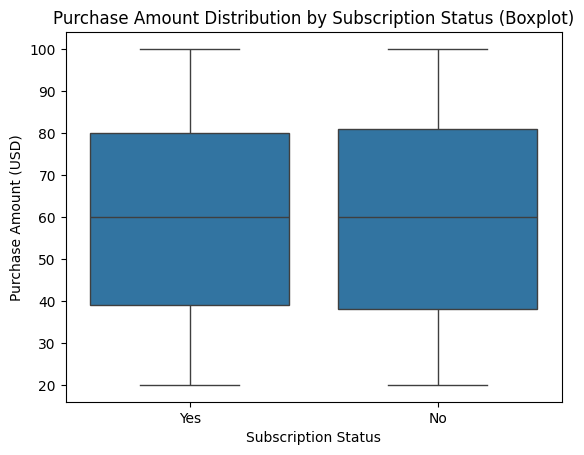

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Subscription Status (Boxplot)')


### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

C:\Users\abdal\AppData\Local\Temp\ipykernel_3216\345901688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


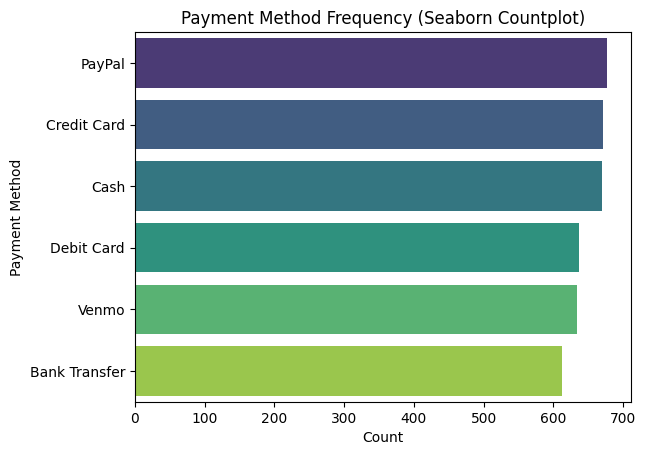

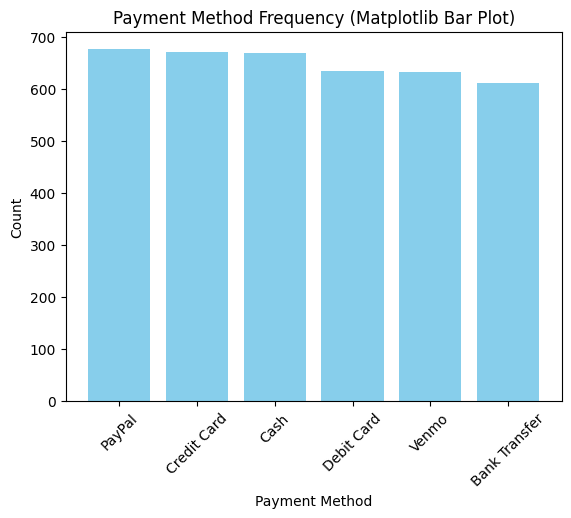

In [7]:
payment_counts = df['Payment Method'].value_counts()
sns.countplot(
    y='Payment Method', 
    data=df,
    order=payment_counts.index,
    palette='viridis'
)
plt.title('Payment Method Frequency (Seaborn Countplot)')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()
plt.bar(payment_counts.index, payment_counts.values, color='skyblue')
plt.title('Payment Method Frequency (Matplotlib Bar Plot)')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

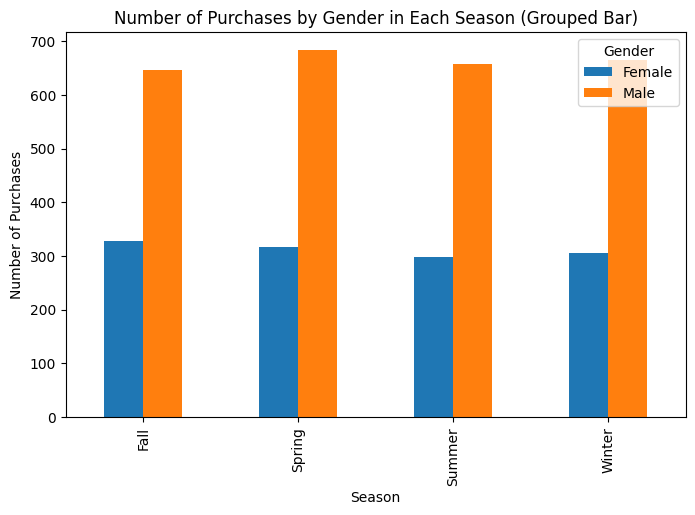

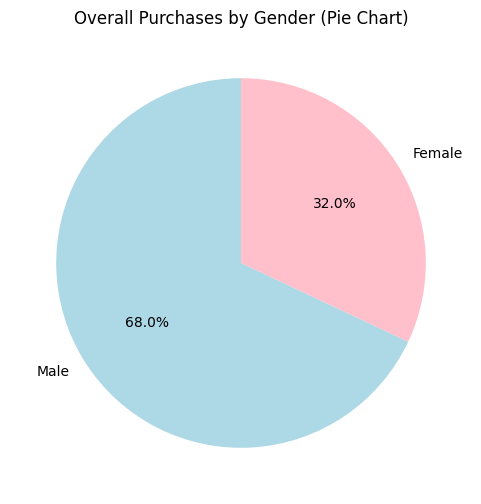

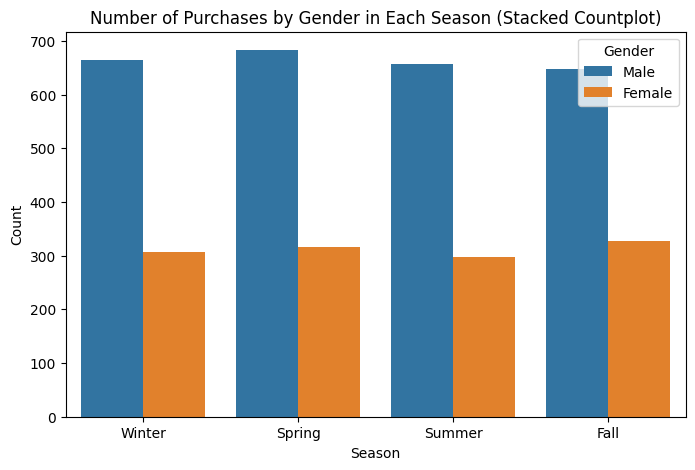

In [13]:
gender_season_counts = df.groupby(['Season', 'Gender']).size().unstack(fill_value=0)

gender_season_counts.plot(kind='bar', figsize=(8,5))
plt.title('Number of Purchases by Gender in Each Season (Grouped Bar)')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Overall Purchases by Gender (Pie Chart)')
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(x='Season', hue='Gender', data=df)
plt.title('Number of Purchases by Gender in Each Season (Stacked Countplot)')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

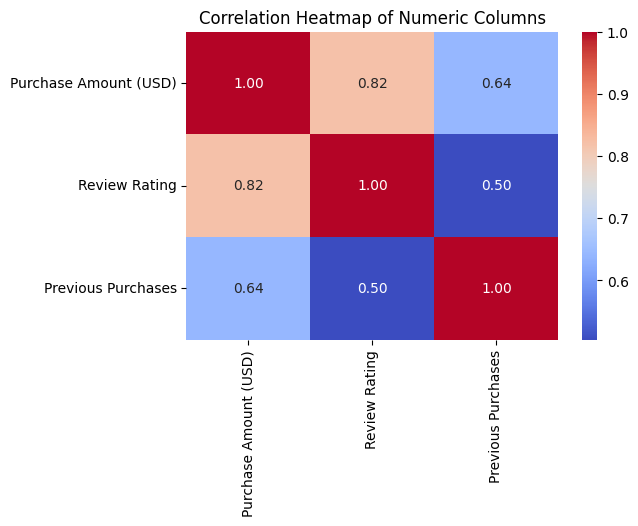

In [20]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

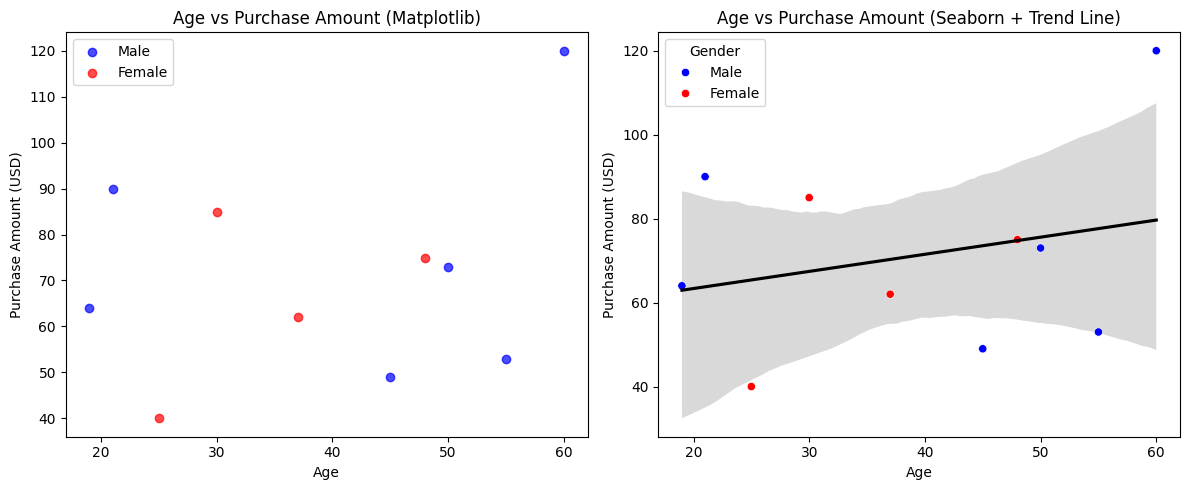

In [24]:

colors = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Age'], subset['Purchase Amount (USD)'], 
                label=gender, color=colors[gender], alpha=0.7)
plt.title('Age vs Purchase Amount (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()

plt.subplot(1, 2, 2)
sns.regplot(x='Age', y='Purchase Amount (USD)', data=df, scatter=False, color='black')
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=df, palette=colors)
plt.title('Age vs Purchase Amount (Seaborn + Trend Line)')

plt.tight_layout()
plt.show()


### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

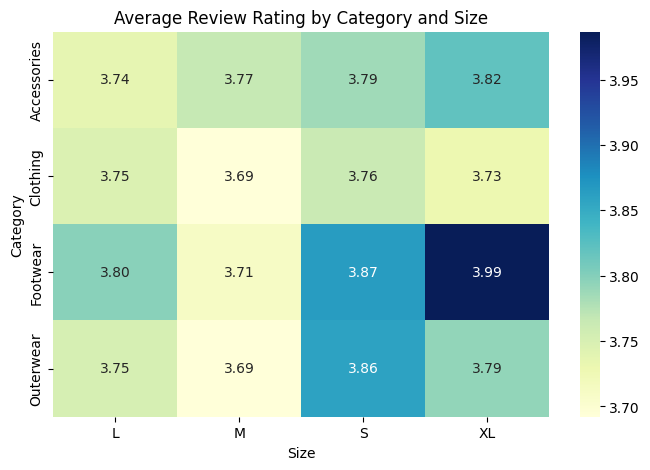

In [27]:
pivot_table = pd.pivot_table(df, values='Review Rating', index='Category', columns='Size', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Review Rating by Category and Size')
plt.show()

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

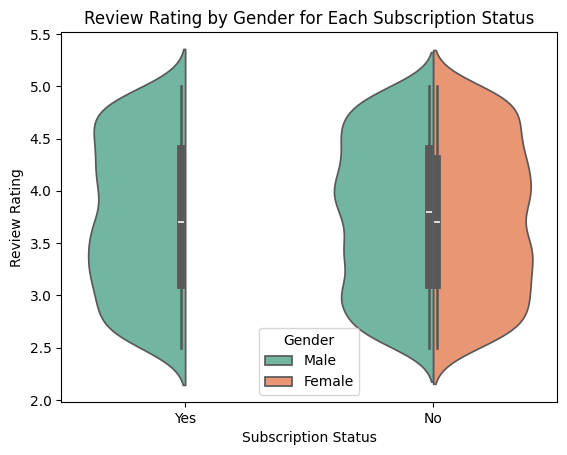

In [28]:
sns.violinplot(
    x='Subscription Status',
    y='Review Rating',
    hue='Gender',
    data=df,
    split=True,           # Split violins by gender
    palette='Set2'
)
plt.title('Review Rating by Gender for Each Subscription Status')
plt.show()

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

Top 5 Items by Total Purchase Amount:
Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64


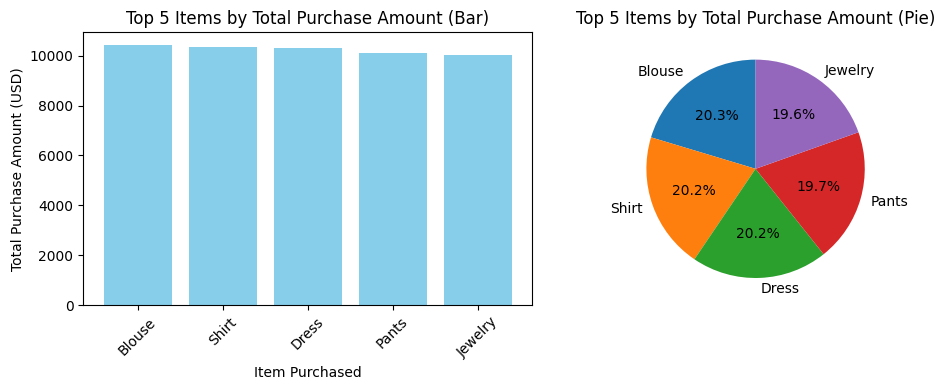

In [29]:
item_totals = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Get top 5 items
top5_items = item_totals.sort_values(ascending=False).head(5)

print("Top 5 Items by Total Purchase Amount:")
print(top5_items)

# --- Bar chart ---
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(top5_items.index, top5_items.values, color='skyblue')
plt.title('Top 5 Items by Total Purchase Amount (Bar)')
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)

# --- Pie chart ---
plt.subplot(1, 2, 2)
plt.pie(top5_items.values, labels=top5_items.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Items by Total Purchase Amount (Pie)')

plt.tight_layout()
plt.show()

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

Top 5 Locations by Average Purchase Amount:
Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64


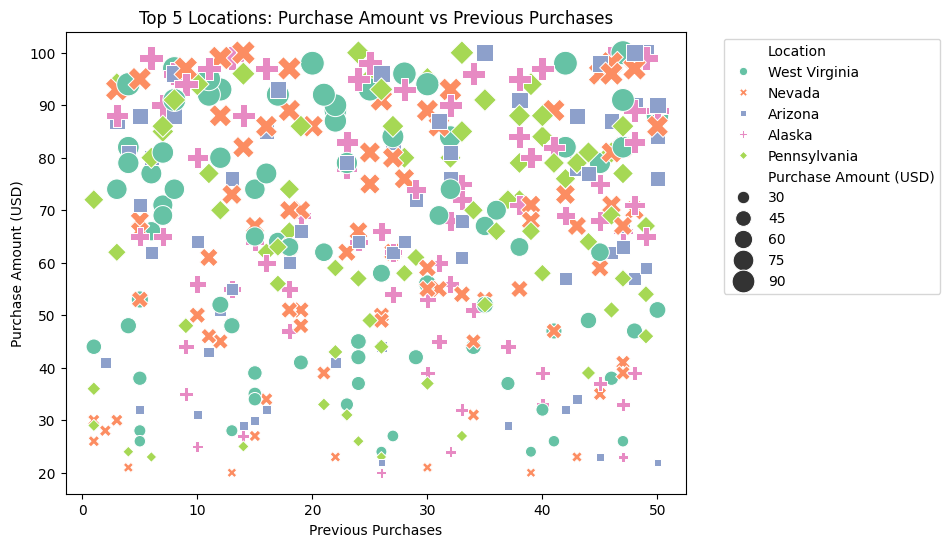

In [30]:
avg_purchase = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Get top 5 locations
top5_locations = avg_purchase.head(5).index

# Filter dataset for top 5 locations
df_top5 = df[df['Location'].isin(top5_locations)]

print("Top 5 Locations by Average Purchase Amount:")
print(avg_purchase.head(5))

# Plot scatterplot with size based on purchase amount
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    size='Purchase Amount (USD)',
    hue='Location',
    data=df_top5,
    sizes=(50, 300),
    style='Location',
    palette='Set2'
)
plt.title('Top 5 Locations: Purchase Amount vs Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

Crosstab of Gender vs Size:
Size      L     M    S   XL
Gender                     
Female  337   590  187  134
Male    716  1165  476  295


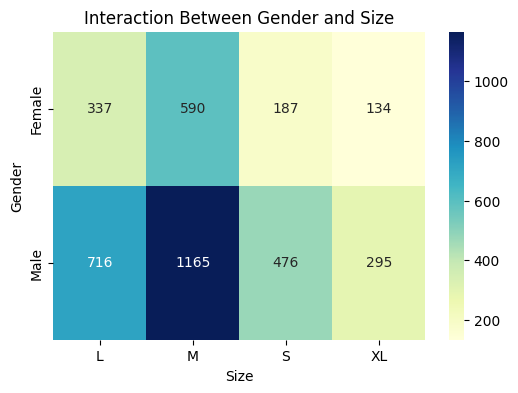

In [31]:
gender_size_ct = pd.crosstab(df['Gender'], df['Size'])

print("Crosstab of Gender vs Size:")
print(gender_size_ct)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(gender_size_ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Interaction Between Gender and Size')
plt.ylabel('Gender')
plt.xlabel('Size')
plt.show()

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

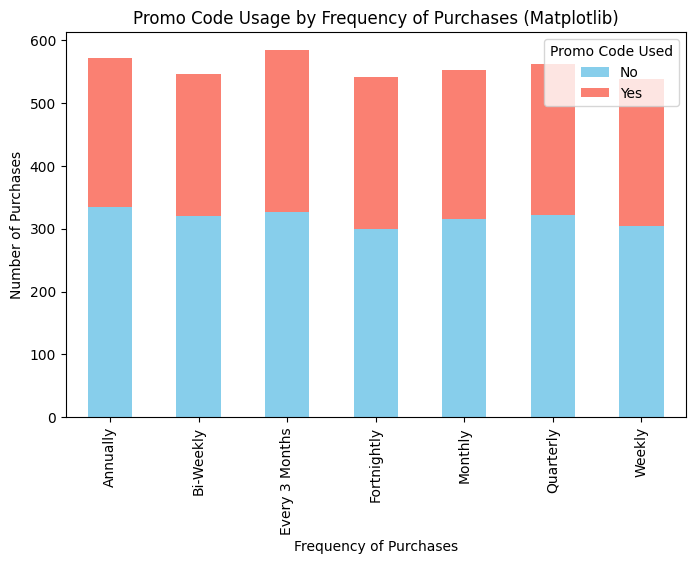

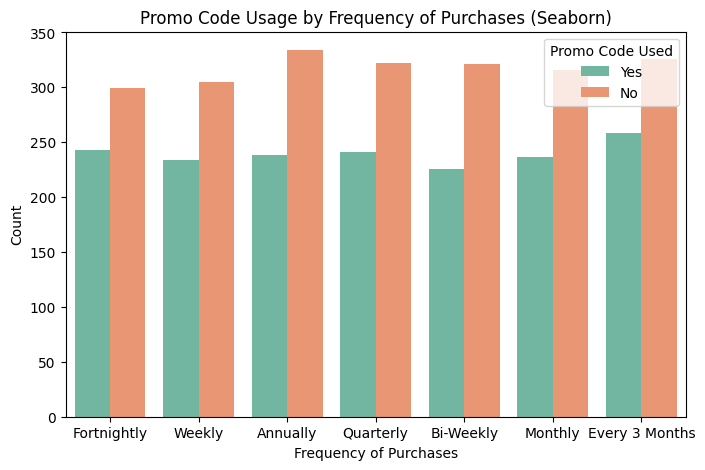

In [ ]:
promo_counts = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])

promo_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['skyblue', 'salmon']
)
plt.title('Promo Code Usage by Frequency of Purchases (Matplotlib)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Purchases')
plt.legend(title='Promo Code Used')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(
    x='Frequency of Purchases',
    hue='Promo Code Used',
    data=df,
    palette='Set2'
)
plt.title('Promo Code Usage by Frequency of Purchases (Seaborn)')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

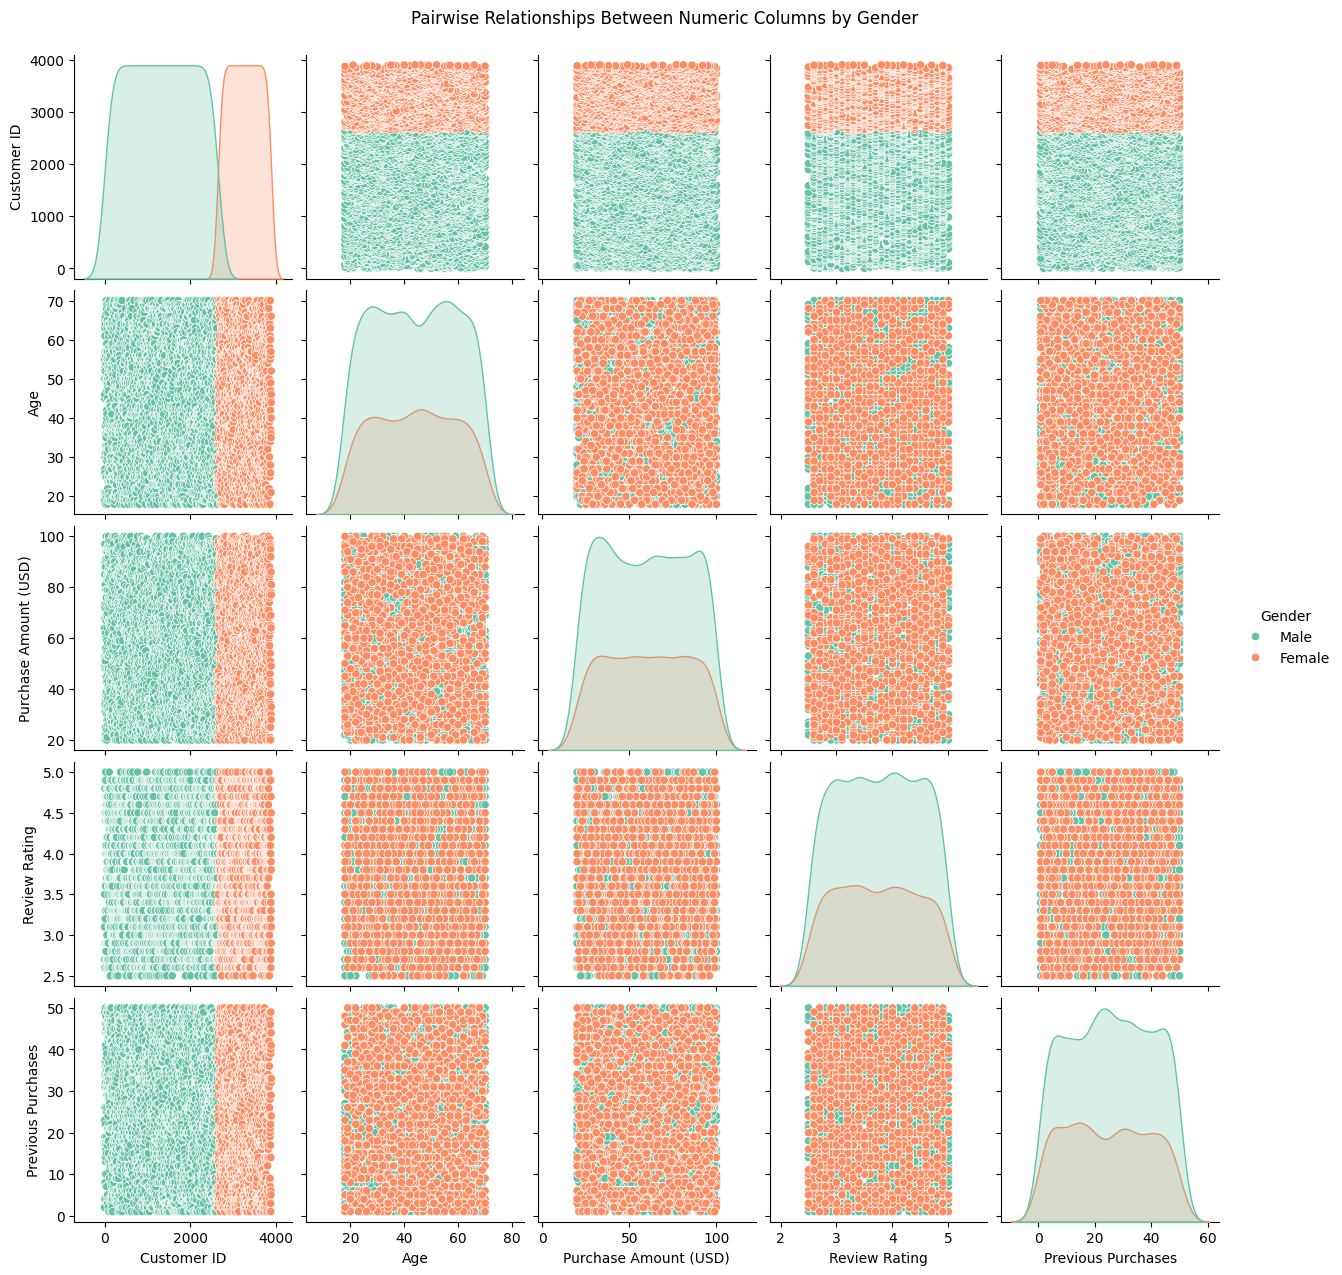

In [33]:
sns.pairplot(df, hue='Gender', diag_kind='kde', palette='Set2')
plt.suptitle('Pairwise Relationships Between Numeric Columns by Gender', y=1.02)
plt.show()